In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv


In [2]:
df = pd.read_csv('/kaggle/input/diabetes-prediction-dataset/diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
#Finding null values
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**This result shows there is no null value in the dataset**

In [5]:
df.gender.value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

**Since other gender data will have small effect on the prediction model, let's remove it for better data anaylsis and model**

In [6]:
#Removing 'Other' from the dataset
df = df.drop(df[df['gender'] == 'Other'].index)
df.gender.value_counts()

Female    58552
Male      41430
Name: gender, dtype: int64

# Data Analysis

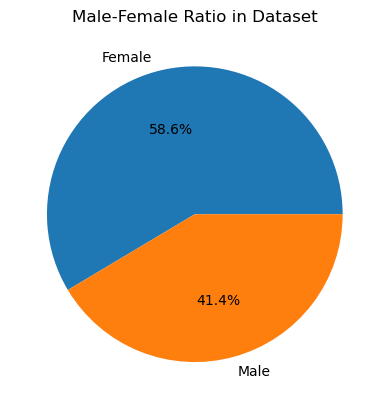

In [7]:
plt.pie(df['gender'].value_counts().values, labels = df['gender'].value_counts().index, autopct='%1.1f%%')
plt.title('Male-Female Ratio in Dataset')
plt.show()

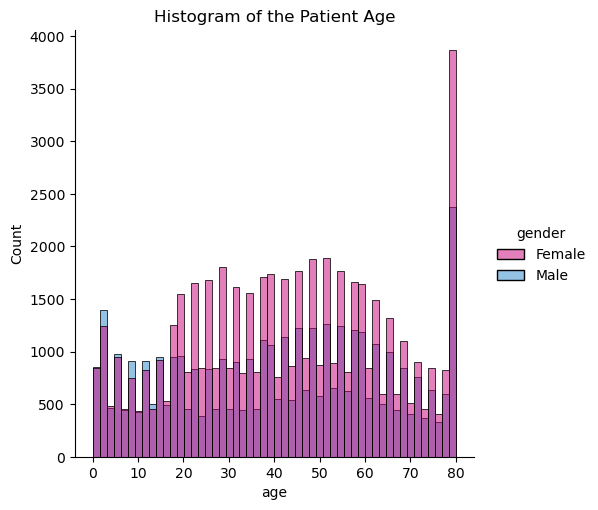

In [8]:
palette = ['#c90076', '#2986cc']
sns.displot(data=df, x='age', hue='gender', palette=palette)
plt.title('Histogram of the Patient Age')
plt.show()

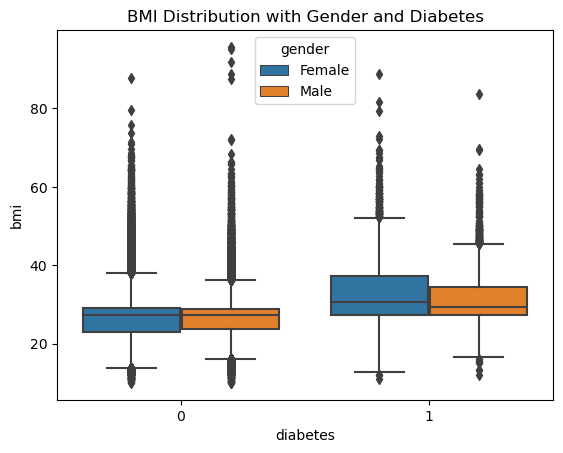

In [9]:
sns.boxplot(data = df, x = 'diabetes', y = 'bmi', hue = 'gender')
plt.title('BMI Distribution with Gender and Diabetes')
plt.show()

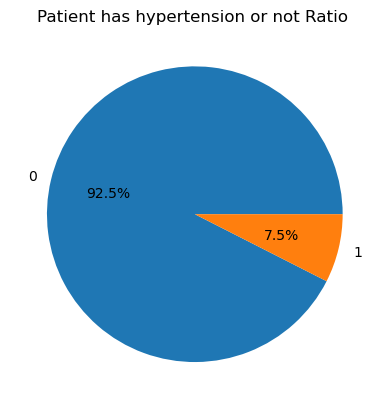

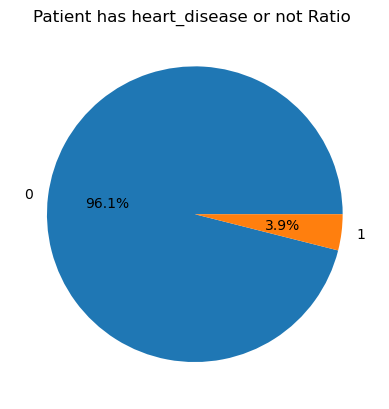

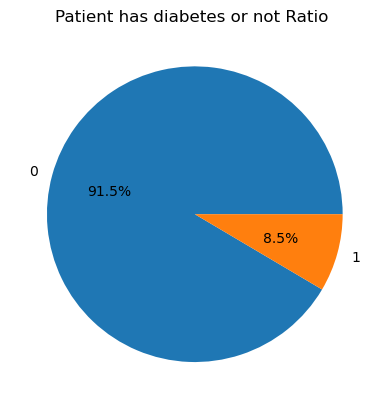

In [10]:
features = ['hypertension', 'heart_disease', 'diabetes']
for i in features:
    plt.pie(df[i].value_counts().values, labels = df[i].value_counts().index, autopct='%1.1f%%')
    plt.title('Patient has {} or not Ratio '.format(i))
    plt.show()

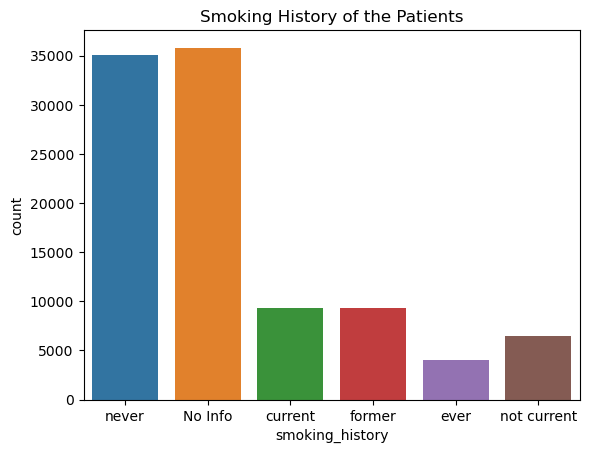

In [11]:
sns.countplot(data = df, x='smoking_history')
plt.title('Smoking History of the Patients')
plt.show()

# ML Model

**Before moving into ML modelling, I would like to edit 'smoking_history' column of this dataset**

In [12]:
df['smoking_history'] = df['smoking_history'].replace('ever', 'past_smoker')
df['smoking_history'] = df['smoking_history'].replace('not current', 'past_smoker')
df['smoking_history'] = df['smoking_history'].replace('former', 'past_smoker')
df['smoking_history'] = df['smoking_history'].replace('No Info', 'non_smoker')
df['smoking_history'] = df['smoking_history'].replace('never', 'non_smoker')
df['smoking_history'] = df['smoking_history'].replace('current', 'smoker')
df.smoking_history.value_counts()

non_smoker     70902
past_smoker    19794
smoker          9286
Name: smoking_history, dtype: int64

In [13]:
#One Hot Encoding
sex = pd.get_dummies(df['gender'])
new_df = pd.concat([df.drop('gender', axis = 1), sex], axis = 1)

smoke = pd.get_dummies(df['smoking_history'])
new_df = pd.concat([new_df.drop('smoking_history', axis = 1), smoke], axis = 1)

new_df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,Female,Male,non_smoker,past_smoker,smoker
0,80.0,0,1,25.19,6.6,140,0,1,0,1,0,0
1,54.0,0,0,27.32,6.6,80,0,1,0,1,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,1,0,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1


In [14]:
#Train-test split
from sklearn.model_selection import train_test_split

y = new_df.diabetes
X = new_df.drop('diabetes', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [15]:
#Scaling 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
#Modelling
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.9505584264044007


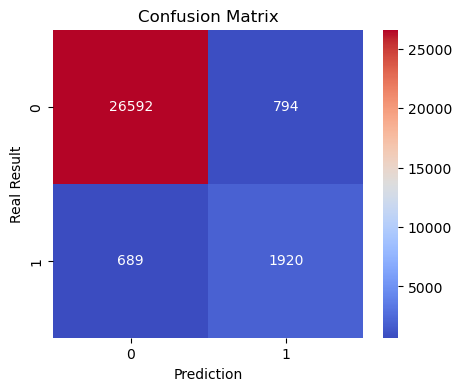

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, cmap='coolwarm', fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Real Result')
plt.title('Confusion Matrix')
plt.show()